# CZ4046 Assignment 1 Part 1

## Value Iteration

### Import required libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

### Define grid

In [2]:
class Grid:
    def __init__(self, width, height, start):
        self.width = width
        self.height = height
        self.i = start[0]
        self.j = start[1]
        
    def set(self, rewards, actions):  
        self.rewards = rewards
        self.actions = actions 
    
    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]
        
    def current_state(self):
        return (self.i, self.j)

    def is_terminal(self, s):
        return s not in self.actions
    
    def move(self, action):
        if action in self.actions[(self.i, self.j)]:
            if action == 'U':
                self.i -= 1
            elif action == 'D':
                self.i += 1
            elif action == 'R':
                self.j += 1
            elif action == 'L':
                self.j -= 1
        
        else:
            pass
        
        return self.rewards.get((self.i, self.j), 0)
    
    def undo_move(self, action):
        if action == 'U':
            self.i += 1
        elif action == 'D':
            self.i -= 1
        elif action == 'R':
            self.j -= 1
        elif action == 'L':
            self.j += 1
            
        assert(self.current_state() in self.all_states())
    
    def end_game(self):
        return (self.i, self.j) not in self.actions
    
    def all_states(self):
        return set(list(self.actions.keys()) + list(self.rewards.keys()))
    
def stand_grid():    
    grid = Grid(6, 6, (3, 2))
    rewards = {(0,0):1, (0,2):1, (0,5):1, (1,3):1, (2,4):1, (3,5):1, (1,1):-1, (1,5):-1, (2,2):-1, (3,3):-1, (4,4):-1}
    actions = {
        (0,0): ('D'),
        (0,2): ('R', 'D'),
        (0,3): ('R', 'D', 'L'),
        (0,4): ('R', 'L'),
        (0,5): ('D', 'L'),
        (1,0): ('U', 'R', 'D'),
        (1,1): ('R', 'D', 'L'),
        (1,2): ('U', 'R', 'D', 'L'),
        (1,3): ('U', 'D', 'L'),
        (1,5): ('U', 'D'),
        (2,0): ('U', 'R', 'D'),
        (2,1): ('U', 'R', 'D', 'L'),
        (2,2): ('U', 'R', 'D', 'L'),
        (2,3): ('U', 'R', 'D', 'L'),
        (2,4): ('R', 'D', 'L'),
        (2,5): ('U', 'D', 'L'),
        (3,0): ('U', 'R', 'D'),
        (3,1): ('U', 'R', 'L'),
        (3,2): ('U', 'R', 'L'),
        (3,3): ('U', 'R', 'L'),
        (3,4): ('U', 'R', 'D', 'L'),
        (3,5): ('U', 'D', 'L'),
        (4,0): ('U', 'D'),
        (4,4): ('U', 'R', 'D'),
        (4,5): ('U', 'D', 'L'),
        (5,0): ('U', 'R'),
        (5,1): ('R', 'L'),
        (5,2): ('R', 'L'),
        (5,3): ('R', 'L'),
        (5,4): ('U', 'R', 'L'),
        (5,5): ('U', 'L')           
    }
    grid.set(rewards, actions)
    return grid

def negative_grid(step_cost=-0.04):
    grid = stand_grid()
    grid.rewards.update({
        (0,3): step_cost,
        (0,4): step_cost,
        (1,0): step_cost,
        (1,2): step_cost,
        (2,0): step_cost,
        (2,1): step_cost,
        (2,3): step_cost,
        (2,5): step_cost,
        (3,0): step_cost,
        (3,1): step_cost,
        (3,2): step_cost,
        (3,4): step_cost,
        (4,0): step_cost,
        (4,5): step_cost,
        (5,0): step_cost,
        (5,1): step_cost,
        (5,2): step_cost,
        (5,3): step_cost,
        (5,4): step_cost,
        (5,5): step_cost,     
    })
    return grid

def start_game(agent, env):
    pass

### Print utility values

In [3]:
hist = []

def print_values(f, V, g):
    for i in range(g.width):
        
        if f == True:
            print("+----------+------------+------------+------------+------------+------------+")
        
        for j in range(g.height):
            v = V.get((i,j), 0)
            
            if f == True:
                print(f' {v:^9.5f} |', end = ' ')
                    
            hist.append(v)
        
        if f == True:        
            print ("")
    if f == True:
        print("+----------+------------+------------+------------+------------+------------+")

### Print policy

In [4]:
def print_policy(P, g):
    for i in range(g.width):
        print("+------+--------+--------+--------+--------+--------+")
        
        for j in range(g.height):
            a = P.get((i,j), ' ')
            print('   {}   |'.format(a), end = ' ')

        print ("")
    print("+------+--------+--------+--------+--------+--------+")

### Value Iteration

In [5]:
SMALL_ENOUGH = 10e-4
GAMMA = 0.99
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

In [6]:
if __name__ == '__main__':
    grid = negative_grid()

    policy = {}
    for s in grid.actions.keys():
        policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)
    
    hist = []
    
    V = {}
    states = grid.all_states()
    
    for s in states:
        
        if s in grid.actions:
            V[s] = 0
        
        else:
            V[s] = 0

    iter_no = 0
    t0 = time.time()

    while True:
        iter_no = iter_no + 1
        print("Iteration " + str(iter_no) + " :: ")
        biggest_change = 0
        
        for s in states: 
            old_v = V[s]
            
            if s in policy: 
                new_v = float('-inf')
                
                for a in ALL_POSSIBLE_ACTIONS:
                    grid.set_state(s)
                    r = grid.rewards.get(grid.current_state(), 0)
                    _ = grid.move(a)
                    v_correct = V[grid.current_state()]
                    grid.set_state(s)
                    
                    if a == 'U':
                        r_clockwise = grid.move('R')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('L')
                    
                    elif a == 'R':
                        r_clockwise = grid.move('D')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('U')
                    
                    elif a == 'D':
                        r_clockwise = grid.move('L')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('R')
                    
                    elif a == 'L':
                        r_clockwise = grid.move('U')
                        v_clockwise = V[grid.current_state()]
                        grid.set_state(s)
                        r_anticlockwise = grid.move('D')
                        
                    v_anticlockwise = V[grid.current_state()]  
                    v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
                    
                    if v > new_v:
                        new_v = v
                
                V[s] = new_v
                biggest_change = max(biggest_change, np.abs(old_v - V[s]))
                
                print('Utilities:')
                print_values(True, V, grid)
                print('\n')
                                
        if biggest_change < SMALL_ENOUGH:
            break
               
    for s in policy.keys():
        best_a = None
        best_value = float('-inf')
        
        for a in ALL_POSSIBLE_ACTIONS:
            
            grid.set_state(s)
            r = grid.rewards.get(grid.current_state(), 0)    
            _ = grid.move(a)
            v_correct = V[grid.current_state()]      
            grid.set_state(s)
            
            if a == 'U':
                r_clockwise = grid.move('R')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('L')
                
            elif a == 'R':
                r_clockwise = grid.move('D')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('U')
                
            elif a == 'D':
                r_clockwise = grid.move('L')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('R')
                
            elif a == 'L':
                r_clockwise = grid.move('U')
                v_clockwise = V[grid.current_state()]
                grid.set_state(s)
                r_anticlockwise = grid.move('D')
                        
            v_anticlockwise = V[grid.current_state()] 
            v = r + GAMMA * (0.8*v_correct + 0.1*v_clockwise + 0.1*v_anticlockwise)
            
            if v > best_value:
                best_value = v
                best_a = a
        
        policy[s] = best_a
        
    t1 = time.time()
    time_taken = t1 - t0
    print('Time Taken:')
    print(time_taken)
    print('\n')

    print('Optimal Utilities:')
    print_values(True, V, grid)
    print('\n')
    print('Optimal Policy:')
    print_policy(policy, grid)
    print('\n')

Streaming output truncated to the last 5000 lines.
+----------+------------+------------+------------+------------+------------+
 96.84117  |  95.47922  |  93.18734  |  93.07063  |  92.99688  |  91.68956  | 
+----------+------------+------------+------------+------------+------------+
 95.44665  |  94.34530  |  93.12643  |  91.00970  |  91.70903  |  91.78382  | 
+----------+------------+------------+------------+------------+------------+
 94.20640  |   0.00000  |   0.00000  |   0.00000  |  89.44421  |  90.46251  | 
+----------+------------+------------+------------+------------+------------+
 92.83148  |  91.62279  |  90.43022  |  89.25148  |  88.46493  |  89.19448  | 
+----------+------------+------------+------------+------------+------------+


Utilities:
+----------+------------+------------+------------+------------+------------+
 99.89128  |   0.00000  |  94.93839  |  93.76904  |  92.54865  |  93.22254  | 
+----------+------------+------------+------------+------------+---------

### Plot of utility estimates as a function of the number of iterations

In [12]:
print("Number of Iterations: ", 689)

num_iter = int(len(hist)/36)

Number of Iterations:  689


In [8]:
hist_0_0 = []
hist_0_1 = []
hist_0_2 = []
hist_0_3 = [] 
hist_0_4 = [] 
hist_0_5 = [] 

hist_1_0 = []
hist_1_1 = [] 
hist_1_2 = []
hist_1_3 = [] 
hist_1_4 = [] 
hist_1_5 = [] 

hist_2_0 = []
hist_2_1 = []
hist_2_2 = []
hist_2_3 = []
hist_2_4 = []
hist_2_5 = []

hist_3_0 = []
hist_3_1 = []
hist_3_2 = []
hist_3_3 = []
hist_3_4 = []
hist_3_5 = []

hist_4_0 = []
hist_4_1 = []
hist_4_2 = []
hist_4_3 = []
hist_4_4 = []
hist_4_5 = []

hist_5_0 = []
hist_5_1 = []
hist_5_2 = []
hist_5_3 = []
hist_5_4 = []
hist_5_5 = []

for i in range(num_iter):
    hist_0_0.append(hist[0+i*36])
    hist_1_0.append(hist[1+i*36])
    hist_2_0.append(hist[2+i*36])
    hist_3_0.append(hist[3+i*36]) 
    hist_4_0.append(hist[4+i*36])
    hist_5_0.append(hist[5+i*36]) 

    hist_0_1.append(hist[6+i*36])
    hist_1_1.append(hist[7+i*36]) 
    hist_2_1.append(hist[8+i*36]) 
    hist_3_1.append(hist[9+i*36]) 
    hist_4_1.append(hist[10+i*36]) 
    hist_5_1.append(hist[11+i*36]) 
    
    hist_0_2.append(hist[12+i*36])
    hist_1_2.append(hist[13+i*36]) 
    hist_2_2.append(hist[14+i*36])
    hist_3_2.append(hist[15+i*36])
    hist_4_2.append(hist[16+i*36])
    hist_5_2.append(hist[17+i*36])
    
    hist_0_3.append(hist[18+i*36])
    hist_1_3.append(hist[19+i*36]) 
    hist_2_3.append(hist[20+i*36])
    hist_3_3.append(hist[21+i*36])
    hist_4_3.append(hist[22+i*36])
    hist_5_3.append(hist[23+i*36])
    
    hist_0_4.append(hist[24+i*36])
    hist_1_4.append(hist[25+i*36]) 
    hist_2_4.append(hist[26+i*36])
    hist_3_4.append(hist[27+i*36])
    hist_4_4.append(hist[28+i*36])
    hist_5_4.append(hist[29+i*36])
    
    hist_0_5.append(hist[30+i*36])
    hist_1_5.append(hist[31+i*36]) 
    hist_2_5.append(hist[32+i*36])
    hist_3_5.append(hist[33+i*36])
    hist_4_5.append(hist[34+i*36])
    hist_5_5.append(hist[35+i*36])

In [9]:
list_of_tuples = [str((i,j)) for i in range(6) for j in range (6)]

In [10]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"]=11,11

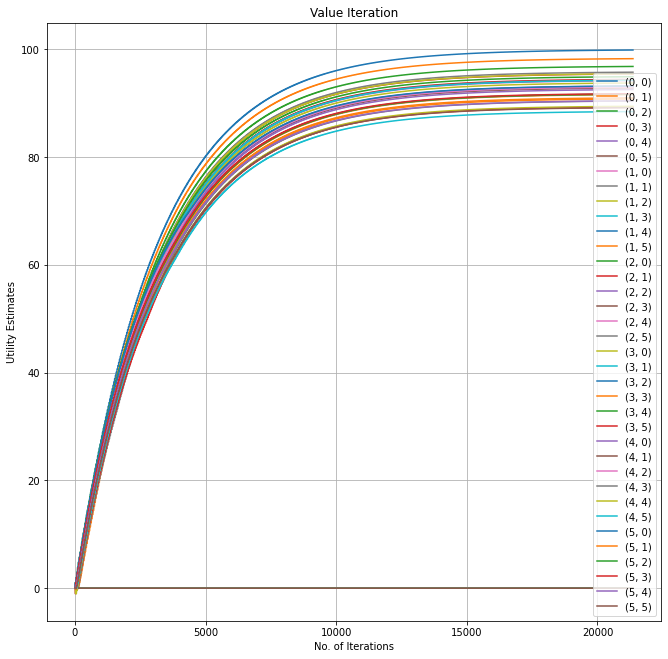

In [11]:
x = [i for i in range(num_iter)]

fig, ax = plt.subplots()
ax.plot(x, hist_0_0)
ax.plot(x, hist_0_1)
ax.plot(x, hist_0_2)
ax.plot(x, hist_0_3)
ax.plot(x, hist_0_4)
ax.plot(x, hist_0_5)

ax.plot(x, hist_1_0)
ax.plot(x, hist_1_1)
ax.plot(x, hist_1_2)
ax.plot(x, hist_1_3)
ax.plot(x, hist_1_4)
ax.plot(x, hist_1_5)

ax.plot(x, hist_2_0)
ax.plot(x, hist_2_1)
ax.plot(x, hist_2_2)
ax.plot(x, hist_2_3)
ax.plot(x, hist_2_4)
ax.plot(x, hist_2_5)

ax.plot(x, hist_3_0)
ax.plot(x, hist_3_1)
ax.plot(x, hist_3_2)
ax.plot(x, hist_3_3)
ax.plot(x, hist_3_4)
ax.plot(x, hist_3_5)

ax.plot(x, hist_4_0)
ax.plot(x, hist_4_1)
ax.plot(x, hist_4_2)
ax.plot(x, hist_4_3)
ax.plot(x, hist_4_4)
ax.plot(x, hist_4_5)

ax.plot(x, hist_5_0)
ax.plot(x, hist_5_1)
ax.plot(x, hist_5_2)
ax.plot(x, hist_5_3)
ax.plot(x, hist_5_4)
ax.plot(x, hist_5_5)

plt.legend(list_of_tuples, loc ="lower right")

ax.set(xlabel='No. of Iterations', ylabel='Utility Estimates', title='Value Iteration')
ax.grid()

fig.savefig("p1-valueIter.png")
plt.show()